In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Amit'

In [4]:
path= 'C:\\Users\\Amit\\Downloads\\'

In [5]:
df= pd.read_csv(path+"weatherAUS.csv")

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df=df.drop(["Evaporation","Sunshine","Cloud9am", "Cloud3pm", "Date"],axis=1)
#axis=1 bcz we'll drop the rows

In [10]:
df.shape

(145460, 18)

In [11]:
df=df.dropna()
#drop the rows with null values

In [12]:
df.shape

(112925, 18)

In [13]:
df.head(20)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


# Data Visualization

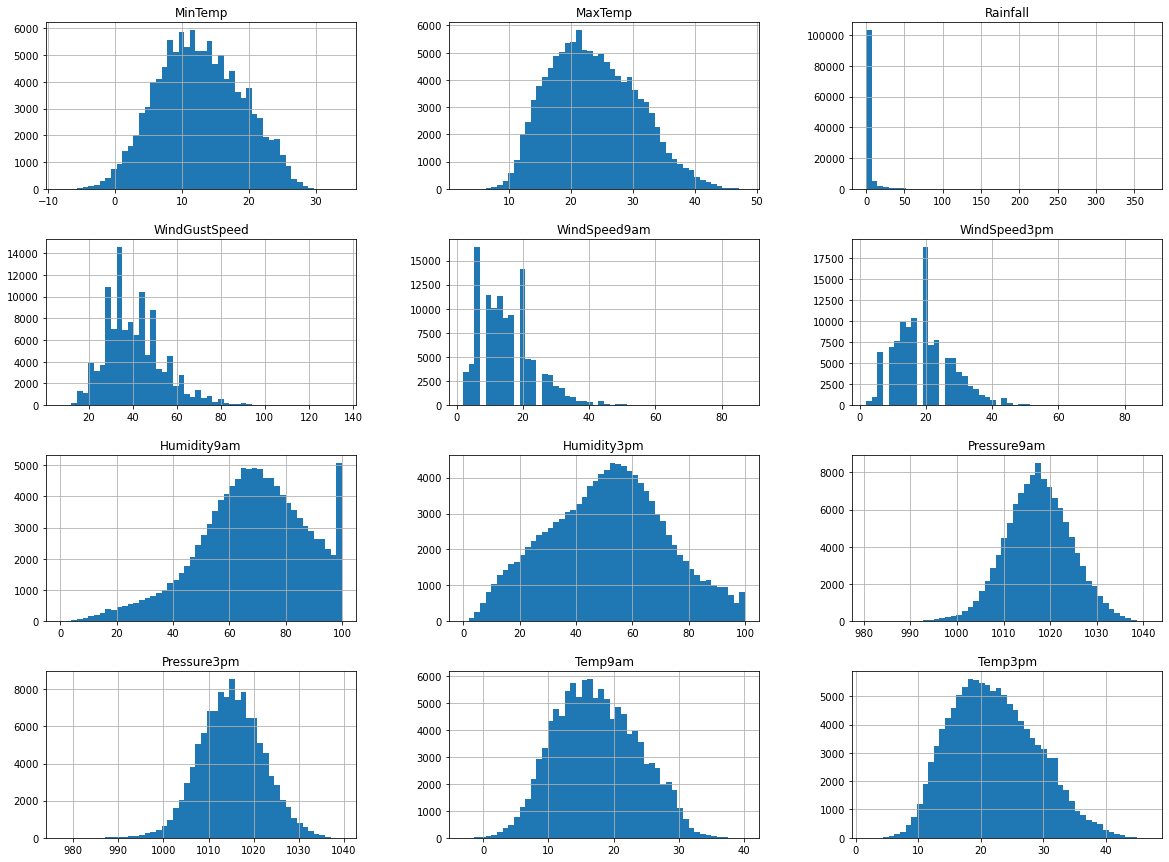

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

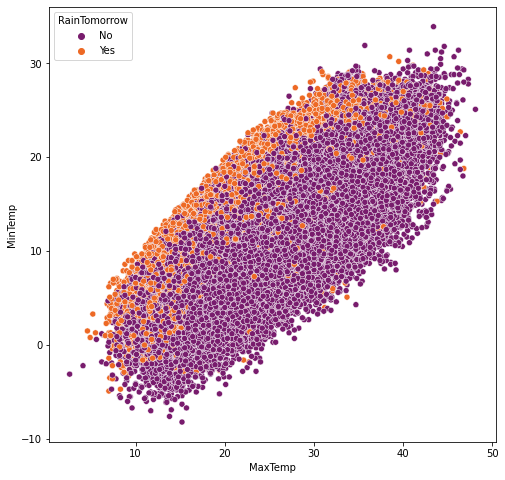

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaxTemp', y='MinTemp', hue='RainTomorrow',palette='inferno', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

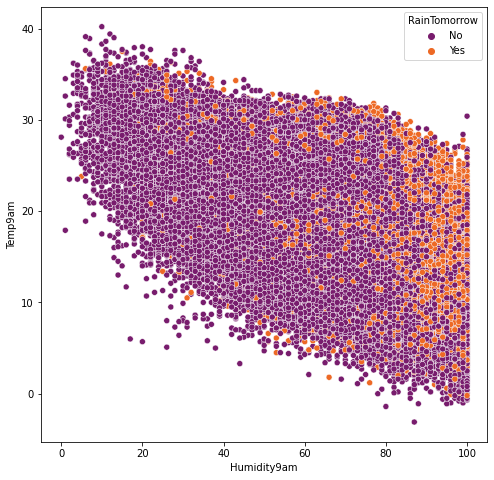

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Humidity9am', y='Temp9am', hue='RainTomorrow',palette='inferno', data=df)

<AxesSubplot:>

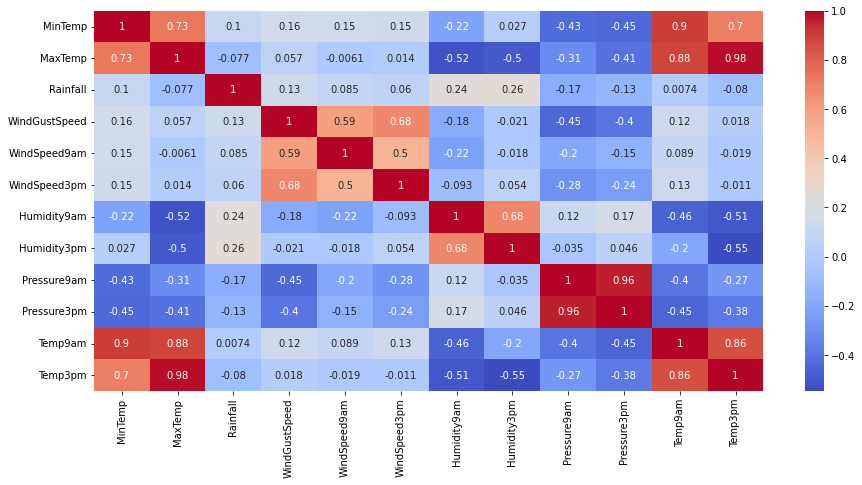

In [17]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(15,7))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

# Encoding categorical values to numerical values

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df.Location)
df['WindGustDir']=le.fit_transform(df.WindGustDir)
df['WindDir9am']=le.fit_transform(df.WindDir9am)
df['WindDir3pm']=le.fit_transform(df.WindDir3pm)
df['RainToday']=le.fit_transform(df.RainToday)
df['RainTomorrow']=le.fit_transform(df.RainTomorrow)

In [19]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
5,1,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
6,1,14.3,25.0,0.0,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0
7,1,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0
8,1,9.7,31.9,0.0,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1
9,1,13.1,30.1,1.4,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0


In [20]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [21]:
print(x)

        Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              1     13.4     22.9       0.6           13           44.0   
1              1      7.4     25.1       0.0           14           44.0   
2              1     12.9     25.7       0.0           15           46.0   
3              1      9.2     28.0       0.0            4           24.0   
4              1     17.5     32.3       1.0           13           41.0   
...          ...      ...      ...       ...          ...            ...   
145454        36      3.5     21.8       0.0            0           31.0   
145455        36      2.8     23.4       0.0            0           31.0   
145456        36      3.6     25.3       0.0            6           22.0   
145457        36      5.4     26.9       0.0            3           37.0   
145458        36      7.8     27.0       0.0            9           28.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           

In [22]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 112925, dtype: int32


In [23]:
y.shape

(112925,)

0    87556
1    25369
Name: RainToday, dtype: int64
0    87906
1    25019
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

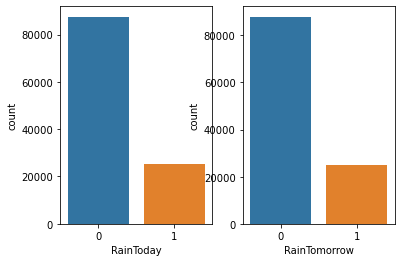

<Figure size 1440x1440 with 0 Axes>

In [24]:
fig, ax =plt.subplots(1,2)
print(df.RainToday.value_counts())
print(df.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

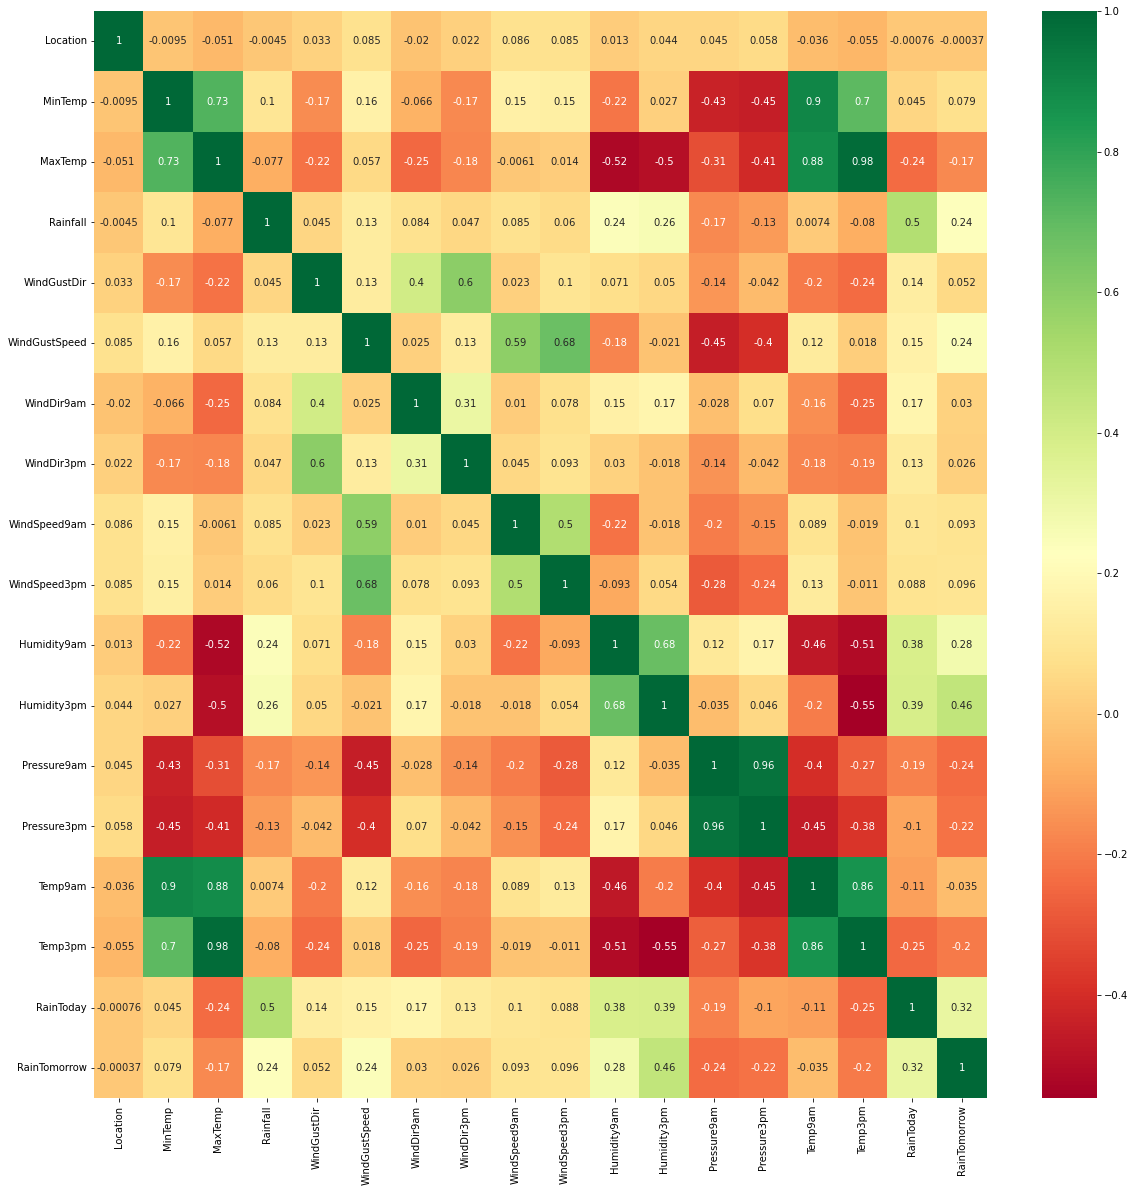

In [25]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

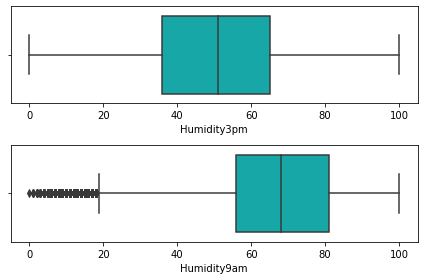

<Figure size 720x720 with 0 Axes>

In [26]:
#Checking the Outliers in the humidity column
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(df['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(df['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

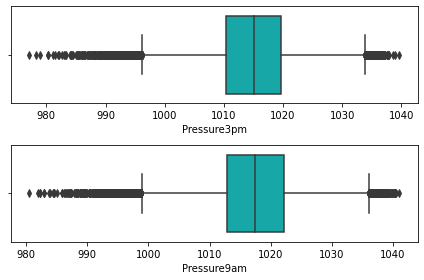

<Figure size 720x720 with 0 Axes>

In [27]:
# Checing the Outlier from 9 - 15 time
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(df['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(df['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

# Data Cleaning

In [28]:
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent') #Cleaning the dataset
#x=imputer.fit_transform(x)
#y=imputer.fit_transform(y)

# Splitting the dataset into Training and Test Data

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
x_train.shape, y_train.shape

((90340, 17), (90340,))

In [59]:
x_test.shape, y_test.shape

((22585, 17), (22585,))

# Class Balancing

In [60]:
y.value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
x_train=scaler.fit_transform(x_train)

In [63]:
x_test=scaler.fit_transform(x_test)

In [64]:
#to inverse the standardization
#scaler.inverse_transform(x_train)

# Training Models-LogisticRegression

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)

Confusion Matrix
-----------------------------------------------------


C:\Users\Amit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


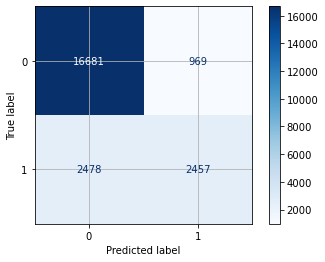



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17650
           1       0.72      0.50      0.59      4935

    accuracy                           0.85     22585
   macro avg       0.79      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



ROC Curve
-----------------------------------------------------


C:\Users\Amit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


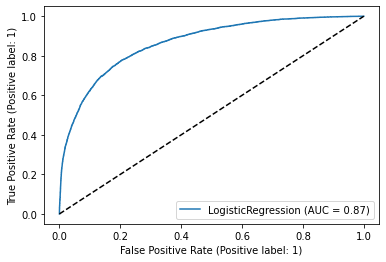



Checking model fitness
-----------------------------------------------------
Train score: 0.8496
Test score:  0.8474




In [67]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
def conf_matrix(model, x_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, x_test, y_test):
    plot_roc_curve(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=predictions):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, x_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, predictions))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, x_test, y_test)
    print('\n')
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(x_train, y_train), 4))
    print('Test score: ', round(model.score(x_test, y_test), 4))
    print('\n')
    
evaluate(lr)

In [68]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, predictions)
print(MSE)

0.1526234226256365


# Linear Regressor

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
li_reg=LinearRegression()
mse=cross_val_score(li_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [71]:
np.mean(mse)

-0.11506763023923457

In [72]:
li_reg.fit(x_train,y_train)
predictions=li_reg.predict(x_test)

# Model Performance

In [73]:
print('Coefficient:', li_reg.coef_)
print('Intercept:', li_reg.intercept_)
print('Mean Squared Error(MSE): %.2f'% mean_squared_error(y_test, predictions))
print('Coefficient of determination (R^2):%.2f'%r2_score(y_test, predictions))

Coefficient: [-0.00880939  0.0031328   0.03694875  0.01733328  0.0064898   0.11926114
 -0.01498587  0.01000563 -0.00488272 -0.06030592 -0.01840119  0.20585679
  0.16263939 -0.22187724 -0.03869187 -0.01790594  0.0451933 ]
Intercept: 0.22231569625857367
Mean Squared Error(MSE): 0.11
Coefficient of determination (R^2):0.33


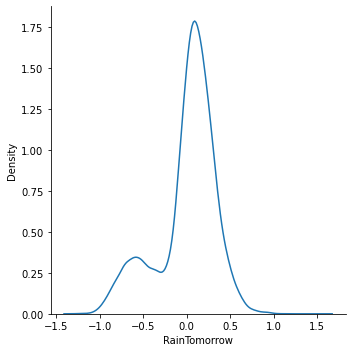

In [74]:
sns.displot(predictions-y_test,kind='kde')

In [75]:
print(np.shape(x_test))
print(np.shape(y_test))

(22585, 17)
(22585,)


(112925,)
(22585,)


ValueError: x and y must be the same size

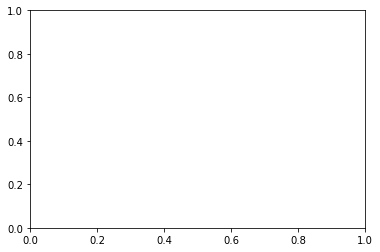

In [76]:
x_test=df['MaxTemp']
print(np.shape(x_test))
print(np.shape(y_test))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train,predictions,color='blue')
plt.axis([0, 20, 0,25])
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train, y_train)
predictions=dt.predict(x_test)

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True, rounded=True, class_names=["No Rain", "Rain"], feature_names=df.columns, fontsize=10);
plt.show()

In [ ]:
print(predictions)

In [ ]:
dt_gini=DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)
dt_gini.fit(x_train, y_train)

In [ ]:
predictions=dt.predict(x_test)
predictions_gini=dt_gini.predict(x_test)

In [ ]:
accuracy_dt=accuracy_score(y_test, predictions)
accuracy_gini=accuracy_score(y_test, predictions_gini)

In [ ]:
print("Accuacy achieved by using entropy:",accuracy_dt)
print("Accuacy achieved by using entropy:",accuracy_gini)


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
def conf_matrix(model, x_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, x_test, y_test):
    plot_roc_curve(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=predictions):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, x_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, predictions))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, x_test, y_test)
    print('\n')
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(x_train, y_train), 4))
    print('Test score: ', round(model.score(x_test, y_test), 4))
    print('\n')
    
evaluate(dt)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, predictions)
print(MSE)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predictions=rf.predict(x_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
def conf_matrix(model, x_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, x_test, y_test):
    plot_roc_curve(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=predictions):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, x_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, predictions))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, x_test, y_test)
    print('\n')
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(x_train, y_train), 4))
    print('Test score: ', round(model.score(x_test, y_test), 4))
    print('\n')
    
evaluate(rf)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, predictions)
print(MSE)

# KNN Classification Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
KNN.fit(x_train, y_train)

In [ ]:
predictions=KNN.predict(x_test)

In [ ]:
def conf_matrix(model, x_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, x_test, y_test):
    plot_roc_curve(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, y_pred=predictions):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, x_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, predictions))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, x_test, y_test)
    print('\n')
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(x_train, y_train), 4))
    print('Test score: ', round(model.score(x_test, y_test), 4))
    print('\n')
    
evaluate(KNN)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, predictions)
print(MSE)